Tugas 3 - Implementasi Hasil VSM dengan Algoritma Logistic Regression

Nama : Isnita Widyur Rahmah
NIM : 220411100048
Kelas : IF 7A

Link Project : https://github.com/taawdyy/ppw

Import Library

In [1]:
# library awal untuk perhitungan dan pengolahan teks
import numpy as np
import pandas as pd

# library untuk proses modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# library untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# save model
import pickle

Menampilkan Data dari File CSV

In [2]:
file_path = 'berita_vsm.csv'
df = pd.read_csv(file_path)

df

,Kategori,abroad,absolut,acara,achmad,acu,adab,adam,adaptif,adb,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055924,0.0,0.0
2,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.044704,0.000000,0.0,0.0
3,Ekonomi,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.052317,0.000000,0.000000,0.0,0.000000,0.084570,0.000000,0.0,0.0
4,Ekonomi,0.0,0.054469,0.0,0.0,0.0,0.0,0.054469,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.062649,0.0,0.000000,0.000000,0.000000,0.0,0.0
96,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.040965,0.000000,0.0,0.081929,0.000000,0.000000,0.0,0.0
97,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
98,Olahraga,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


Mengonversi Kategori Teks Menjadi Label Numerik Menggunakan LabelEncoder

Dalam code tersebut, Label Encoding digunakan untuk mengonversi kategori teks menjadi angka

In [3]:
# menggunakan label_encoder untuk merubah kata menjadi angka
label_encoder = preprocessing.LabelEncoder()
df['Kategori']= label_encoder.fit_transform(df['Kategori'])

df

,Kategori,abroad,absolut,acara,achmad,acu,adab,adam,adaptif,adb,...,yoppy,yuan,yudha,yuran,yusuf,zayana,zona,zonasi,zulhas,zulkifli
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.055924,0.0,0.0
2,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.044704,0.000000,0.0,0.0
3,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.052317,0.000000,0.000000,0.0,0.000000,0.084570,0.000000,0.0,0.0
4,0,0.0,0.054469,0.0,0.0,0.0,0.0,0.054469,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.062649,0.0,0.000000,0.000000,0.000000,0.0,0.0
96,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.040965,0.000000,0.0,0.081929,0.000000,0.000000,0.0,0.0
97,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
98,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


Memisahkan Fitur dan Target untuk Training Model

Code ini bertujuan untuk mempersiapkan dataset training model dengan memisahkan fitur (X) dan target (y). Pemisahan ini penting agar model dapat dilatih dengan data training dan dievaluasi dengan data testing yang terpisah, untuk menilai kinerjanya pada data yang belum pernah dilihat sebelumnya.

In [4]:
# split data untuk data feature dan data target
X = df.drop(['Kategori'], axis=1)
y = df['Kategori']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# fit model untuk training
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# evaluasi model
y_pred = lr_model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

Membuat DataFrame untuk Menampilkan Nilai Aktual dan Prediksi

Code ini bertujuan untuk menyusun dan menampilkan hasil prediksi model bersama nilai sebenarnya dalam bentuk tabel yang terorganisir.Kemudian mempermudah analisis dengan menunjukkan secara langsung bagaimana model bekerja pada tiap sampel dalam data uji. Dan mengidentifikasi apakah model membuat prediksi yang benar atau salah, dengan membandingkan nilai prediksi dan nilai aktual.

In [5]:
# melihat nilai actual dan predicted
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
83,1,1
30,0,0
56,1,1
24,0,0
16,0,0


Menghitung dan Visualisasi Confusion Matrix serta Menampilkan Laporan Klasifikasi

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



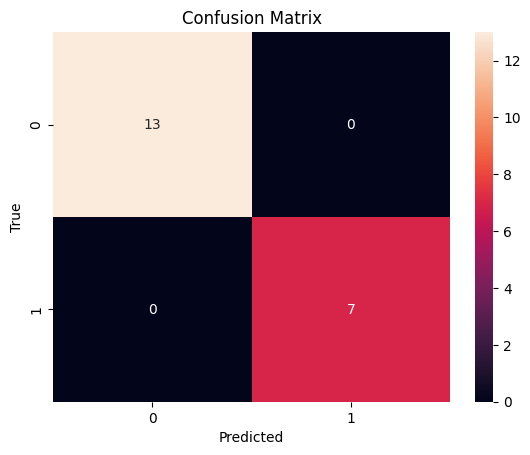

In [6]:
# Confusion matrix dan classification report
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

- Menghitung Confusion Matrix : Memberikan pandangan komprehensif tentang jumlah prediksi yang benar dan salah dalam setiap kelas.
- Visualisasi Confusion Matrix : Heatmap mempermudah interpretasi hasil prediksi dengan menggunakan representasi visual dari Confusion Matrix.
- Mendapatkan Laporan Klasifikasi : Laporan ini mencakup metrik penting seperti precision, recall, dan F1-score, yang memberikan evaluasi yang lebih dalam tentang performa model, terutama ketika ada ketidakseimbangan antar kelas.

Menyimpan Model Logistic Regression ke dalam File Menggunakan Pickle

In [7]:
# Save the pipeline to a file
filename = 'lr_model.sav'
pickle.dump(lr_model, open(filename, 'wb'))